## Customer Segmentation using K-Means Clustering

### Import Depdendencies

In [1]:
import os
import pandas as pd

# folder
file_path = "../Resources/"

### Import data

In [2]:
# Products
aisles = pd.read_csv(os.path.join(file_path, "aisles.csv"))
departments = pd.read_csv(os.path.join(file_path, "departments.csv"))
products = pd.read_csv(os.path.join(file_path, "products.csv"))
orders = pd.read_csv(os.path.join(file_path, "orders.csv"))
order_products_train = pd.read_csv(os.path.join(file_path, "order_products__train.csv"))
order_products_prior = pd.read_csv(os.path.join(file_path, "order_products__prior.csv"))

### Merge Data Tables

In [3]:
# Products with aisle and department
products_merge = products.merge(aisles, how='left', on='aisle_id').merge(departments, how='left', on='department_id')
products_merge.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [4]:
# Concat prior and training dataset
order_products = order_products_prior.append(order_products_train, ignore_index=True)
order_products.describe()

,order_id,product_id,add_to_cart_order,reordered
count,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07
mean,1.710566e+06,2.557551e+04,8.367738e+00,5.900617e-01
std,9.874008e+05,1.409770e+04,7.139540e+00,4.918220e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.554130e+05,1.351900e+04,3.000000e+00,0.000000e+00
50%,1.710660e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565587e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


In [5]:
# Order History with product names
orders_merge = orders.merge(order_products, on='order_id').merge(products_merge, on='product_id').sort_values(by='order_id')
orders_merge[orders_merge['order_id']==1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
23218323,1,112108,train,4,4,10,9.0,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
13576120,1,112108,train,4,4,10,9.0,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce
32575950,1,112108,train,4,4,10,9.0,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods
4129259,1,112108,train,4,4,10,9.0,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce
2346045,1,112108,train,4,4,10,9.0,47209,7,0,Organic Hass Avocado,24,4,fresh fruits,produce
281612,1,112108,train,4,4,10,9.0,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce
32723104,1,112108,train,4,4,10,9.0,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
4262054,1,112108,train,4,4,10,9.0,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs


### Customers Count

In [6]:
print(f'There are {len(orders["user_id"].unique())} users in orders table. {len(orders[orders["eval_set"]=="train"]["user_id"].unique())} is in original training set')

There are 206209 users in orders table. 131209 is in original training set


### Purchases by Aisle by User

In [7]:
orders_user_aisle = pd.crosstab(index=orders_merge['user_id'], columns=orders_merge['aisle'])
orders_user_aisle.head(20)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,5
8,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
9,0,0,0,0,6,0,2,0,0,0,...,0,0,0,0,0,0,0,3,0,28


In [8]:
orders_user_aisle['Total'] = orders_user_aisle.sum(axis=1)

In [9]:
import matplotlib.pyplot as plt
plt.figure()
orders_user_aisle['Total'].plot(kind='hist', bins=range(0,max(orders_user_aisle['Total'])+100, 100))
plt.show()

<Figure size 640x480 with 1 Axes>

In [10]:
orders_user_aisle['Total'].describe()

count    206209.000000
mean        164.004025
std         206.014923
min           3.000000
25%          44.000000
50%          90.000000
75%         196.000000
max        3725.000000
Name: Total, dtype: float64

### Training Set
Select 20,000 customers with over 100 items ordered

In [11]:
orders_user_aisle_sub = orders_user_aisle[orders_user_aisle['Total'] >= 100]
orders_user_aisle_sub.shape

(96040, 135)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(orders_user_aisle_sub, train_size=0.2, random_state=42)
X_train

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,Total
user_id,,,,,,,,,,,,,,,,,,,,,
143962,0,0,0,0,3,0,2,0,0,0,...,0,0,3,0,0,0,8,0,14,316
159651,0,4,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,5,0,6,116
98176,0,0,0,0,0,0,2,0,2,0,...,1,0,0,0,0,0,1,0,20,271
96077,1,0,0,0,0,0,4,2,0,0,...,5,0,3,0,2,0,5,0,4,257
42814,0,2,0,0,11,0,1,0,0,0,...,2,0,3,0,0,0,22,0,33,474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13607,0,0,0,0,19,0,1,0,0,0,...,0,0,11,0,0,0,0,0,43,986
117498,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,110
164881,0,1,0,0,0,0,6,0,0,0,...,0,0,0,1,0,0,1,0,10,118


In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

In [16]:
scaler = RobustScaler()
data_rescaled = scaler.fit_transform(X_train.iloc[:, :-1])

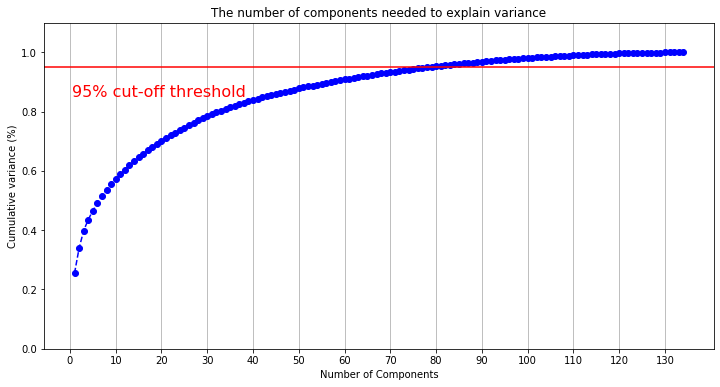

In [17]:
model = PCA().fit(data_rescaled)

# % matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 135, step=1)
y = np.cumsum(model.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 140, step=10)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [53]:
# number of components
n_pcs= model.components_.shape[0]
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = orders_user_aisle.iloc[:, :-1].columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
df = pd.DataFrame(dic.items())
df
# df.to_csv('pca.csv')

In [60]:
model.components_[0]

array([0.00466119, 0.05900292, 0.00630231, 0.00503144, 0.57761814,
       0.0118852 , 0.05560439, 0.00714666, 0.00176489, 0.00594526,
       0.01034632, 0.08254381, 0.12762244, 0.03654211, 0.00750668,
       0.00648336, 0.04427909, 0.09379871, 0.15431981, 0.04965095,
       0.04859656, 0.10407735, 0.01891408, 0.01863851, 0.08294792,
       0.08206254, 0.03522629, 0.00613271, 0.09509462, 0.00699525,
       0.07821321, 0.11182534, 0.10916121, 0.13536292, 0.00375001,
       0.01459918, 0.01071725, 0.04104982, 0.01240111, 0.04203559,
       0.10868566, 0.0751496 , 0.36041556, 0.03803438, 0.001396  ,
       0.00204503, 0.00577237, 0.00263919, 0.0218786 , 0.07189717,
       0.07525172, 0.05690372, 0.01493593, 0.05831104, 0.09074546,
       0.01729619, 0.12508883, 0.00593392, 0.00161503, 0.17019128,
       0.02881173, 0.06375241, 0.06213373, 0.03787772, 0.10933708,
       0.05363341, 0.05598489, 0.00976548, 0.02644293, 0.07270776,
       0.11915407, 0.08305034, 0.00386262, 0.0056528 , 0.08649

In [18]:
# 95% of variance
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

In [19]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabaz_score

def kmeans_metrics(data, k):
    '''
        Compute K-Means partitions for various values of K, ranging from 
        2 to k+1.  Caclucate the inertia, silhouette score, and calinkski-harabaz
        score for each value of k, returning the results.
        
        Params
        ------
        data: The dataset to perform KMeans clustering
        
        k: The number of partitions to create
    '''
    
    # create an array to hold our results
    inertias = []
    silhouette_scores = []
    calinski_score = []
    
    # Process each range
    for i in range(2, k+1):
        print('processing k={}'.format(i))
        
        # build model
        model = KMeans(n_clusters=i, init='k-means++',random_state=42).fit(data)
        
        # determine scores
        inertias.append(model.inertia_)
        silhouette_scores.append(silhouette_score(data, model.labels_))
        calinski_score.append(calinski_harabaz_score(data, model.labels_))
    
    return inertias, silhouette_scores, calinski_score

In [20]:
clusters = 20
# find the inertias related to each cluster size
inertias, silhouette_scores, calinski_score = kmeans_metrics(reduced, clusters)

processing k=2


C:\Users\chanwc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


processing k=3


C:\Users\chanwc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


processing k=4


C:\Users\chanwc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


processing k=5


C:\Users\chanwc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


processing k=6


C:\Users\chanwc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


processing k=7


C:\Users\chanwc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


processing k=8


C:\Users\chanwc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


processing k=9


C:\Users\chanwc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


processing k=10


C:\Users\chanwc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


processing k=11


C:\Users\chanwc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


processing k=12


C:\Users\chanwc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


processing k=13


C:\Users\chanwc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


processing k=14


C:\Users\chanwc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


processing k=15


C:\Users\chanwc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


processing k=16


C:\Users\chanwc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


processing k=17


C:\Users\chanwc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


processing k=18


C:\Users\chanwc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


processing k=19


C:\Users\chanwc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


processing k=20


C:\Users\chanwc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


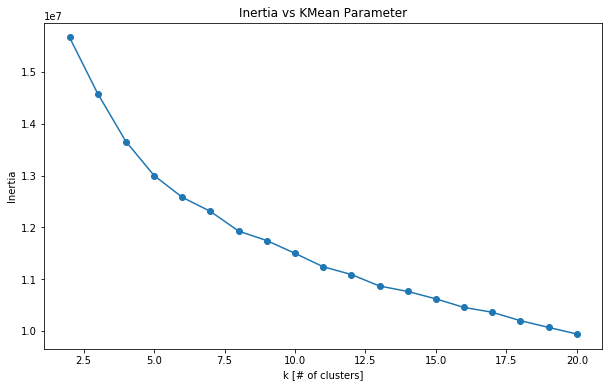

In [21]:
# Plot our results for inertia vs cluster size
fig, ax = plt.subplots(figsize=(10,6))

# plot results
plt.plot(np.arange(2, clusters+1), inertias, 'o-')

# set labels
plt.xlabel('k [# of clusters]')
plt.ylabel('Inertia')
plt.title('Inertia vs KMean Parameter')

# plt.savefig('../reports/figures/kmeans_inertia.png')

plt.show()

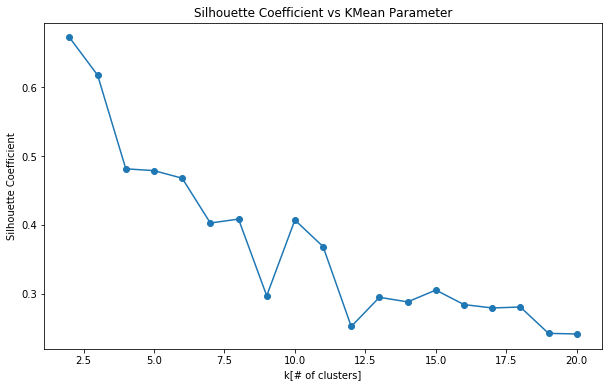

In [22]:
# plot silhouette vs cluster size 
fig, ax = plt.subplots(figsize=(10,6))

# plot silhouette_scores
plt.plot(np.arange(2, clusters+1), silhouette_scores, 'o-')

# set label
plt.ylabel('Silhouette Coefficient')
plt.xlabel('k[# of clusters]')
plt.title('Silhouette Coefficient vs KMean Parameter')

# save
# plt.savefig('../reports/figures/kmeans_silhouette_coefficient.png')

plt.show()

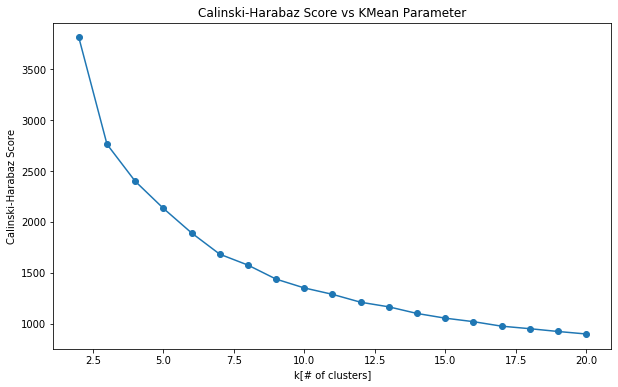

In [23]:
fig, ax = plt.subplots(figsize=(10,6))

# plot calinski_score
plt.plot(np.arange(2, clusters+1), calinski_score,'o-')

# set label
plt.ylabel('Calinski-Harabaz Score')
plt.xlabel('k[# of clusters]')
plt.title('Calinski-Harabaz Score vs KMean Parameter')

# save
# plt.savefig('../reports/figures/kmeans_calinski_harabaz_score.png')

plt.show()

In [44]:
pd.DataFrame(reduced)

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,-2.878050,-1.680572,-0.291981,2.851453,2.299242,11.178002,-6.145324,2.542159,-0.879571,-5.265255,...,-0.110406,0.746458,-0.126322,0.308226,0.012021,-0.446563,-0.659447,-0.345035,0.101216,-0.973130
1,3.667230,-5.604276,0.158310,-8.913235,13.237846,-4.616524,3.530555,-0.515357,-0.161491,-1.295749,...,-0.877372,0.051363,-2.084168,0.409118,-1.632381,0.852111,0.625025,-0.315934,-0.263901,0.347568
2,-5.564465,1.721454,1.255403,-0.855524,-0.820494,-0.078275,0.565138,-0.077806,-0.262908,0.668902,...,-0.081018,-0.154994,-0.233467,-0.013543,-0.366783,-0.540471,-0.370500,0.097349,0.197130,-0.158768
3,-7.353458,2.418036,1.545108,-2.249705,2.442632,0.587187,0.321137,-0.264370,0.173516,-0.117471,...,0.021311,0.288546,-0.220553,0.583389,-0.056214,-0.018659,0.521838,0.780978,0.199141,0.087304
4,-7.481900,2.663775,2.036041,-1.012224,-0.526826,-0.035699,0.426885,0.067778,-0.007168,-0.219414,...,-0.260722,-0.240003,-0.101311,-0.014296,0.094815,-0.100629,-0.094390,0.106336,-0.112094,0.022834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,-6.952954,2.352918,1.818507,0.821839,0.281844,-0.357463,0.507291,-0.707494,1.274239,0.461052,...,-0.057917,0.147554,-0.298675,-0.004854,-0.008448,0.121115,0.058856,-0.099986,0.046134,-0.322648
206205,11.160169,-10.661909,-3.843233,0.174755,-0.683113,4.781008,-0.353195,1.447339,1.849125,-2.324729,...,-0.916779,0.526481,1.384184,-0.112849,0.191143,-0.019102,2.109608,3.174992,-0.631795,-0.520803
206206,1.951346,-2.272105,2.401021,-1.202747,-3.581759,-3.543790,-0.091377,-1.214852,-2.711183,-1.714938,...,-0.459546,-0.056655,-1.301937,-0.078528,1.155576,0.325086,2.160653,-1.800092,0.530183,0.408266
206207,29.997337,-20.428701,10.623999,0.416199,-10.155172,-16.223868,-6.730368,0.796470,10.184529,-5.688829,...,7.349126,-0.564357,-0.616910,0.015813,2.658626,-1.207034,4.280901,0.419848,-1.884596,-2.124035


In [24]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=4, random_state=42).fit(reduced)
c_pred = kmeans_model.predict(reduced)

# print our the number of observations per cluster
for c in np.unique(c_pred):
        print('cluster {}: {}'.format(c, np.sum(c_pred==c)))

cluster 0: 18027
cluster 1: 140
cluster 2: 216
cluster 3: 825


In [35]:
# add the predicticed cluster to our original dataframe
kmeans_cluster = X_train.iloc[:, :-1].copy()
kmeans_cluster['cluster'] = c_pred

# print our the number of observations per cluster
for c in np.unique(kmeans_cluster.cluster):
        print('cluster {}: {}'.format(c, np.sum(kmeans_cluster.cluster==c)))

cluster 0: 18027
cluster 1: 140
cluster 2: 216
cluster 3: 825


In [36]:
kmeans_cluster.groupby('cluster').mean()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.174793,1.513618,0.063072,0.061241,1.040328,0.292339,2.853830,0.187386,0.048871,0.349975,...,2.509347,2.319521,1.196483,1.719865,0.264825,0.255395,0.389028,7.142231,0.237200,12.925168
1,0.121429,2.742857,1.200000,0.485714,141.242857,0.571429,6.121429,0.521429,0.100000,0.042857,...,6.321429,5.778571,3.107143,4.500000,0.700000,0.664286,1.892857,15.814286,0.014286,42.142857
2,0.004630,0.203704,0.000000,0.000000,0.000000,0.361111,1.314815,0.240741,0.009259,0.166667,...,2.287037,1.550926,0.101852,0.393519,2.009259,0.222222,0.041667,7.037037,0.064815,7.143519
3,0.077576,2.086061,0.335758,0.351515,41.667879,0.298182,4.210909,0.178182,0.077576,0.027879,...,4.481212,2.693333,2.166061,3.298182,0.320000,0.289697,0.640000,10.242424,0.063030,28.827879


In [37]:
top_aisle_per = kmeans_cluster[kmeans_cluster.cluster==0].mean() / kmeans_cluster[kmeans_cluster.cluster==0].mean().sum()
top_aisle_per.sort_values(ascending=False)[:12]

aisle
fresh fruits                     0.113203
fresh vegetables                 0.111287
packaged vegetables fruits       0.055692
yogurt                           0.045992
packaged cheese                  0.030313
milk                             0.026900
water seltzer sparkling water    0.025414
chips pretzels                   0.023020
soy lactosefree                  0.019931
bread                            0.018324
refrigerated                     0.018011
frozen produce                   0.016038
dtype: float64

In [38]:
top_aisle_per = kmeans_cluster[kmeans_cluster.cluster==1].mean() / kmeans_cluster[kmeans_cluster.cluster==0].mean().sum()
top_aisle_per.sort_values(ascending=False)[:12]

aisle
baby food formula                0.502584
fresh fruits                     0.360812
fresh vegetables                 0.272185
packaged vegetables fruits       0.153337
yogurt                           0.149957
packaged cheese                  0.096633
milk                             0.093609
water seltzer sparkling water    0.056272
bread                            0.052765
frozen produce                   0.052536
soy lactosefree                  0.052510
crackers                         0.052155
dtype: float64

In [39]:
top_aisle_per = kmeans_cluster[kmeans_cluster.cluster==2].mean() / kmeans_cluster[kmeans_cluster.cluster==0].mean().sum()
top_aisle_per.sort_values(ascending=False)[:12]

aisle
packaged produce                 0.256544
fresh fruits                     0.193235
packaged vegetables fruits       0.063671
fresh vegetables                 0.050475
milk                             0.031992
yogurt                           0.025419
water seltzer sparkling water    0.025040
packaged cheese                  0.023129
chips pretzels                   0.021185
cereal                           0.021020
soft drinks                      0.020361
bread                            0.016556
dtype: float64

In [40]:
top_aisle_per = kmeans_cluster[kmeans_cluster.cluster==3].mean() / kmeans_cluster[kmeans_cluster.cluster==0].mean().sum()
top_aisle_per.sort_values(ascending=False)[:12]

aisle
fresh fruits                     0.228917
fresh vegetables                 0.180990
baby food formula                0.148267
packaged vegetables fruits       0.104170
yogurt                           0.102578
packaged cheese                  0.066495
milk                             0.064205
water seltzer sparkling water    0.036446
bread                            0.034923
soy lactosefree                  0.034250
frozen produce                   0.032318
chips pretzels                   0.031490
dtype: float64